In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
import imutils
import seaborn as sns
from tensorflow import io
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
import cv2
import keras
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

2022-01-13 23:38:32.136898: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/carlos/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-01-13 23:38:32.136958: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
# se cargan las imagenes a la memoria para la red neuronal
dirname = os.path.join(os.getcwd(), '/home/carlos/Programing/ProyectoIA/data') #Cambiar directorio al directorio donde se tiene las carpetas con la data 
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            #image = plt.imread(filepath)
            image = cv2.imread(filepath)
            image = cv2.resize(image,(40,40))
            #image = imutils.resize(image, width=40,height=40)            
            #image = Image.open(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  /home/carlos/Programing/ProyectoIA/data/
/home/carlos/Programing/ProyectoIA/data/Señales/SeñalTerremoto2 1
/home/carlos/Programing/ProyectoIA/data/Señales/SeñalTerremoto3 994
/home/carlos/Programing/ProyectoIA/data/Señales/SeñaleSocorroGenero1 992
/home/carlos/Programing/ProyectoIA/data/Señales/SeñalTerremoto4 964
/home/carlos/Programing/ProyectoIA/data/Señales/SeñalSocorroGenero2 303
/home/carlos/Programing/ProyectoIA/data/Señales/SeñalTerremoto1 1338
Directorios leidos: 6
Imagenes en cada directorio [995, 992, 964, 303, 1338, 1072]
suma Total de imagenes en subdirs: 5664


In [6]:
## etiquetado de imágenes para la creación de red neuronal ##

labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))
 
senales=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    senales.append(name[len(name)-1])
    indice=indice+1
     
y = np.array(labels)
X = np.array(images )

classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Cantidad etiquetas creadas:  5664
0 SeñalTerremoto2
1 SeñalTerremoto3
2 SeñaleSocorroGenero1
3 SeñalTerremoto4
4 SeñalSocorroGenero2
5 SeñalTerremoto1
Total number of outputs :  6
Output classes :  [0 1 2 3 4 5]


In [7]:
y.astype(float)

array([0., 0., 0., ..., 5., 5., 5.])

In [8]:
y.shape

(5664,)

In [9]:
X.shape

(5664, 40, 40, 3)

In [11]:
##Creación de grupos de entrenamiento

#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('grupo de entrenamiento : ', train_X.shape, train_Y.shape)
print('grupo de testeo: ', test_X.shape, test_Y.shape)


grupo de entrenamiento :  (4531, 40, 40, 3) (4531,)
grupo de testeo:  (1133, 40, 40, 3) (1133,)


In [12]:

##normalización de los datos
#train_X=np.array(train_X[0 in range(4531)],dtype=np.float)
train_X = train_X / 255.
test_X = test_X / 255.
 
# los labels se transforman en variables categoricas
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

 
#muestra el cambio de categoria a codificación
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])
 
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
 
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0. 0.]
(3624, 40, 40, 3) (907, 40, 40, 3) (3624, 6) (907, 6)


In [13]:

train_X

array([[[[0.77254902, 0.79607843, 0.77254902],
         [0.76862745, 0.79607843, 0.76862745],
         [0.76862745, 0.78823529, 0.78039216],
         ...,
         [0.80392157, 0.82352941, 0.81568627],
         [0.80392157, 0.82352941, 0.81568627],
         [0.80392157, 0.82352941, 0.81568627]],

        [[0.76862745, 0.78823529, 0.78039216],
         [0.76862745, 0.78823529, 0.78039216],
         [0.77254902, 0.79215686, 0.78431373],
         ...,
         [0.80392157, 0.82352941, 0.81568627],
         [0.80784314, 0.82745098, 0.81960784],
         [0.80784314, 0.82745098, 0.81960784]],

        [[0.77254902, 0.79215686, 0.78823529],
         [0.77254902, 0.79215686, 0.78823529],
         [0.77647059, 0.79215686, 0.79215686],
         ...,
         [0.80784314, 0.82745098, 0.81960784],
         [0.81176471, 0.83137255, 0.82352941],
         [0.81176471, 0.83137255, 0.82352941]],

        ...,

        [[0.76078431, 0.78823529, 0.78431373],
         [0.76078431, 0.78823529, 0.78431373]

In [15]:

epochs = 200
batch_size = 60
 
hands_model = Sequential()
hands_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(40,40,3)))
hands_model.add(LeakyReLU(alpha=0.05))
hands_model.add(MaxPooling2D((2, 2),padding='same'))
hands_model.add(Dropout(0.5)) #evitar el overfiting 
 
hands_model.add(Flatten())
hands_model.add(Dense(32, activation='linear'))
hands_model.add(LeakyReLU(alpha=0.05))
hands_model.add(Dropout(0.5)) 
hands_model.add(Dense(nClasses, activation='softmax'))
 
hands_model.summary()
 
hands_model.compile(loss='categorical_crossentropy', optimizer='adagrad',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 20, 20, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                409632    
                                                      

In [16]:
hands_model_o = hands_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/200
61/61 [==============================] - 4s 45ms/step - loss: 1.7712 - accuracy: 0.2161 - val_loss: 1.7030 - val_accuracy: 0.2811
Epoch 2/200
61/61 [==============================] - 3s 43ms/step - loss: 1.7176 - accuracy: 0.2594 - val_loss: 1.6165 - val_accuracy: 0.4333
Epoch 3/200
61/61 [==============================] - 3s 45ms/step - loss: 1.6633 - accuracy: 0.3035 - val_loss: 1.5730 - val_accuracy: 0.4421
Epoch 4/200
61/61 [==============================] - 3s 46ms/step - loss: 1.6420 - accuracy: 0.3135 - val_loss: 1.5315 - val_accuracy: 0.4620
Epoch 5/200
61/61 [==============================] - 3s 48ms/step - loss: 1.5925 - accuracy: 0.3521 - val_loss: 1.4715 - val_accuracy: 0.4895
Epoch 6/200
61/61 [==============================] - 3s 43ms/step - loss: 1.5594 - accuracy: 0.3750 - val_loss: 1.4179 - val_accuracy: 0.5722
Epoch 7/200
61/61 [==============================] - 3s 46ms/step - loss: 1.5294 - accuracy: 0.4051 - val_loss: 1.3962 - val_accuracy: 0.5204
Epoch 

In [18]:
hands_model.save("hands_model1.h5")

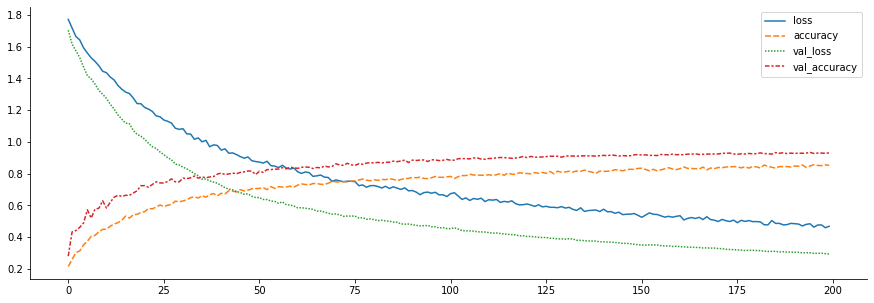

In [19]:
loss = pd.DataFrame(hands_model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=1.5)
sns.despine()